In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

Given mean shifts $[a_1,...,a_{n}]$ and weights $[w_1,...,w_n]$ (that are nonnegative and sum to 1), we define our prior and likelihood:

$$p(\theta) \sim N(0,1)$$

$$p(x|\theta) \sim \sum_{i=1}^{n} w_i N(x; \theta + a_i, 1)$$

We can calculate the corresponding posterior and evidence in closed form:

$$p(x) = \int p(x|\theta)p(\theta)d\theta = \frac{1}{\sqrt{4\pi}} \sum_{i=1}^{n} w_i e^{-\frac{1}{4}(x-a_i)^2} = \sum_{i=1}^{n}w_i N(x;a_i,2)$$

$$p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} = \frac{1}{2\pi}\sum_{i=1}^{n} e^{-\frac{1}{4}(x-a_i)^2}w_ie^{-\left( \theta-\frac{x-a_i}{2}\right)^2} = \frac{1}{\sqrt{4\pi}}\sum_{i=1}^{n}  w_ie^{-\frac{1}{4}(x-a_i)^2} N\left(\theta;\frac{x-a_i}{2},\frac{1}{2}\right)$$

In [203]:
# Densities
def prior(theta):
    return np.exp(-theta**2/2)/np.sqrt(2*np.pi)

def likelihood(x, theta, weights, mean_shifts):
    """
    Returns density of MOG with weights and means given below (all variances are 1)
    means of component i = theta + mean_shift[i]
    """
    density = 0
    for w, m_s in zip(weights, mean_shifts):
        density += w * np.exp(-(x-theta-m_s)**2/2) / np.sqrt(2*np.pi)
    return density

def posterior(theta, x, weights, mean_shifts):
    evidence_ = evidence(x, weights, mean_shifts)
    return (prior(theta) * likelihood(x, theta, weights, mean_shifts))/evidence_

def evidence(x, weights, mean_shifts):
    return sum([w * np.exp(-(x-m_s)**2/4) for w,m_s in zip(weights, mean_shifts)])/(2*np.sqrt(np.pi))


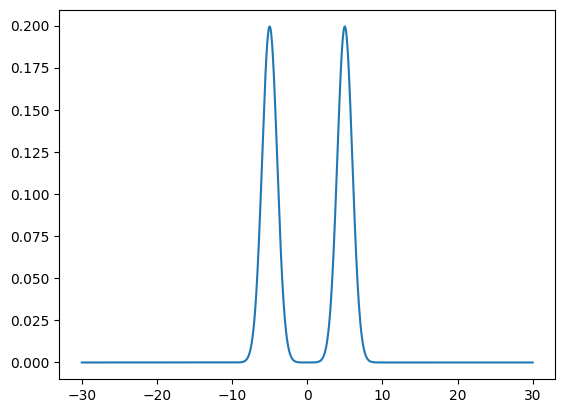

In [208]:
x = np.linspace(-30,30,1000)
theta = 0
weights = [0.5,0.5]
mean_shifts = [-5,5]
plt.plot(x, likelihood(x, theta, weights, mean_shifts))

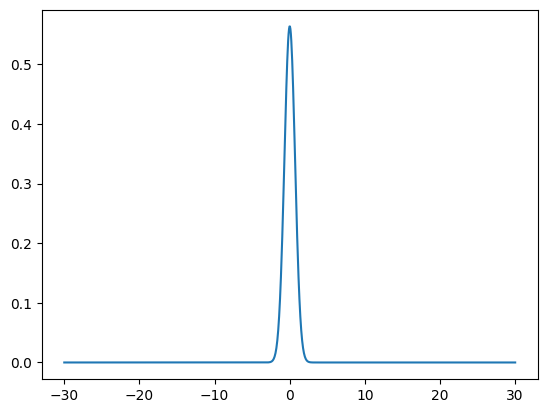

In [209]:
theta = np.linspace(-30,30,1000)
x = 5
weights = [0.5,0.5]
mean_shifts = [-5,5]
plt.plot(theta, posterior(theta, x, weights, mean_shifts))

Now we generalize to the case where the prior variance is $\sigma^2$. Given mean shifts $[a_1,...,a_{n}]$ and weights $[w_1,...,w_n]$ (that are nonnegative and sum to 1), we define our prior and likelihood:

$$p(\theta) \sim N(0,\sigma^2)$$

$$p(x|\theta) \sim \sum_{i=1}^{n} w_i N(x; \theta + a_i, 1)$$

We can calculate the corresponding posterior and evidence in closed form:

$$p(x) = \int p(x|\theta)p(\theta)d\theta = \frac{1}{\sqrt{2\pi(1+\sigma^2)}} \sum_{i=1}^{n} w_i e^{-\frac{(x-a_i)^2}{2(1+\sigma^2)}} = \sum_{i=1}^{n}w_i N(x;a_i,1+\sigma^2)$$

$$p(\theta|x) = \frac{p(x|\theta)p(\theta)}{p(x)} =
\frac{1}{\sqrt{2\pi(1+\sigma^2)}}\sum_{i=1}^{n} 
w_i e^{-\frac{(x-a_i)^2}{2(1+\sigma^2)}} 
e^{-\frac{1+\sigma^2}{2\sigma^2}\left(\theta-\frac{\sigma^2(x-a_i)}{1+\sigma^2}\right)^2}
= \sum_{i=1}^{n}  w_i N\left(\theta;\frac{\sigma^2(x-a_i)}{1+\sigma^2},\frac{\sigma^2}{1+\sigma^2}\right)$$


In [ ]:
# Densities
def prior(theta):
    return np.exp(-theta**2/(2*sigma**2))/np.sqrt(2*np.pi*sigma**2)

def likelihood(x, theta, weights, mean_shifts):
    """
    Returns density of MOG with weights and means given below (all variances are 1)
    means of component i = theta + mean_shift[i]
    """
    density = 0
    for w, m_s in zip(weights, mean_shifts):
        density += w * np.exp(-(x-theta-m_s)**2/2) / np.sqrt(2*np.pi)
    return density

def posterior(theta, x, weights, mean_shifts):
    evidence_ = evidence(x, weights, mean_shifts)
    return (prior(theta) * likelihood(x, theta, weights, mean_shifts))/evidence_

def evidence(x, weights, mean_shifts):
    return sum([w * np.exp(-(x-m_s)**2/(2*(1+sigma**2))) for w,m_s in zip(weights, mean_shifts)])/(np.sqrt(2*np.pi*(1+sigma**2)))


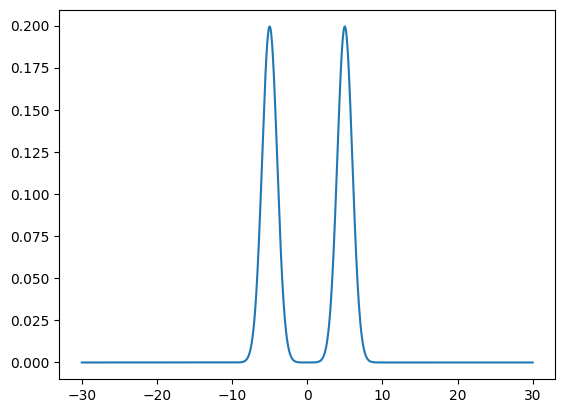

In [ ]:
x = np.linspace(-30,30,1000)
theta = 0
weights = [0.5,0.5]
mean_shifts = [-5,5]
plt.plot(x, likelihood(x, theta, weights, mean_shifts))

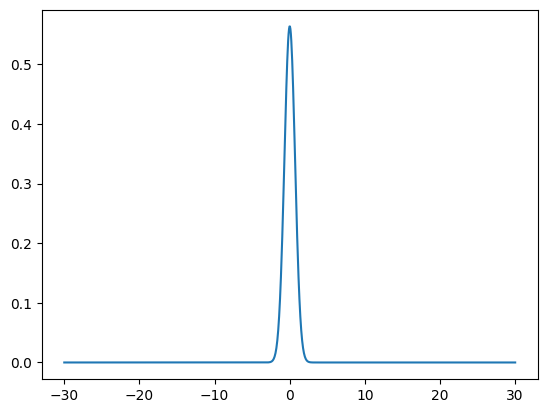

In [216]:
sigma=1
theta = np.linspace(-30,30,1000)
x = 5
weights = [0.5,0.5]
mean_shifts = [-5,5]
plt.plot(theta, posterior(theta, x, weights, mean_shifts))